#### Hacettepe University

#### Artificial Intelligence Engineering Department

#### Name - Surname :  Mehmet Alperen Ozcelik

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
fileObject = open("data.txt", "r")
data = fileObject.read()
df = pd.read_csv(data)
print(df.shape)
df.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df = df[['text','airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [4]:
df.describe()

,text,airline_sentiment
count,14640,14640
unique,14427,3
top,@united thanks,negative
freq,6,9178


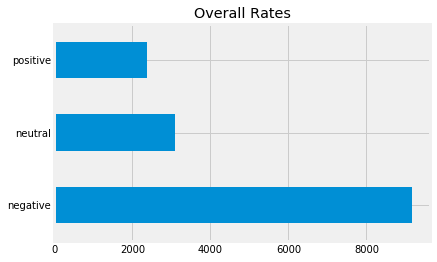

In [5]:
df.airline_sentiment.value_counts().plot(kind = 'barh', title = 'Overall Rates')

### Tokenize

In [6]:
import nltk
from nltk import word_tokenize, sent_tokenize

tokens = df['text'].apply(word_tokenize)
tokens.head()

0       [@, VirginAmerica, What, @, dhepburn, said, .]
1    [@, VirginAmerica, plus, you, 've, added, comm...
2    [@, VirginAmerica, I, did, n't, today, ..., Mu...
3    [@, VirginAmerica, it, 's, really, aggressive,...
4    [@, VirginAmerica, and, it, 's, a, really, big...
Name: text, dtype: object

## Advanced Preprocessing

In [7]:
import string
import inflect
from autocorrect import spell
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def delete_airline_name(tokens):
    
    return tokens[2:]

def remove_non_ascii(tokens):
    
    sentence = []
    for word in tokens:
        encoded_string = word.encode('ascii', 'ignore')
        decode_string = encoded_string.decode()
        sentence.append(decode_string)
    return sentence

def lowercase(tokens):
    
    sentence = []
    for word in tokens:
        sentence.append(word.lower())
    return sentence

def remove_punctuation(tokens):
    
    sentence = []
    for word in tokens:
        new_word = word.translate(str.maketrans('', '', string.punctuation))
        if new_word != '':
            sentence.append(new_word)
    return sentence

def numbers_to_text(tokens):
    
    p = inflect.engine()
    sentence = []
    for word in tokens:
        if word.isdigit():
            text = p.number_to_words(word)
            sentence.append(text)
        else:
            sentence.append(word)
    return sentence

def remove_stopwords(tokens):

    sentence = []
    for word in tokens:
        if word not in stopwords.words('english'):
            sentence.append(word)
    return sentence


def tokens_to_sentence(tokens):
    
    sentence = ' '.join(tokens)
    return sentence

def aplly_all_methods(tokens):

    tokens = tokens.apply(delete_airline_name)
    tokens = tokens.apply(remove_non_ascii)
    tokens = tokens.apply(lowercase)
    tokens = tokens.apply(remove_punctuation)
    tokens = tokens.apply(numbers_to_text)
    tokens = tokens.apply(remove_stopwords)
    sentence = tokens.apply(tokens_to_sentence)
    return sentence

In [8]:
text = aplly_all_methods(tokens)

### Data Frame Before Processing

In [9]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Data Frame After Processing

In [10]:
df['text'] = text
df.head()

,text,airline_sentiment
0,dhepburn said,neutral
1,plus added commercials experience tacky,positive
2,nt today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative


In [11]:
X = df['text']
y = df['airline_sentiment']

### TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

vector_array = vectorizer.fit_transform(df['text']).toarray()

vector_df = pd.DataFrame(vector_array, columns = vectorizer.get_feature_names())
vector_df

,021mbps,0xjared,10000lbs,1000cost,1000p,1000pm,1001pm,1005am,1005pm,1007p,...,zkatcher,zombie,zone,zones,zoom,zrh,zrhairport,zukes,zurich,zurichnew
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
pos = vector_df.iloc[df[df.airline_sentiment == 'positive'].index]
pos = pos.mean().sort_values(ascending = False)

neutral = vector_df.iloc[df[df.airline_sentiment == 'neutral'].index]
neutral = neutral.mean().sort_values(ascending = False)

neg = vector_df.iloc[df[df.airline_sentiment == 'negative'].index]
neg = neg.mean().sort_values(ascending = False)

### Wordcloud of Positive Tweets:

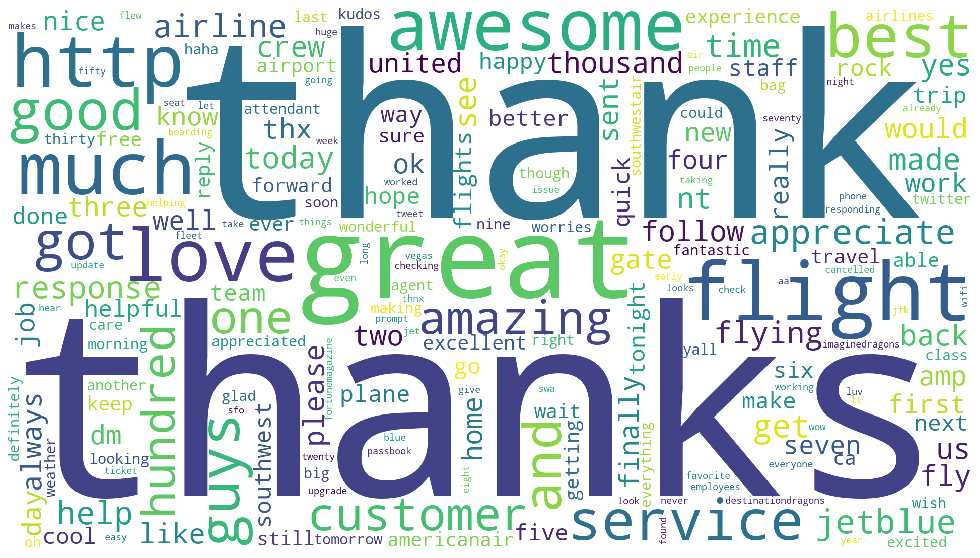

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1920, height=1080, background_color="white").generate_from_frequencies(pos)

fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud of Negative Tweets

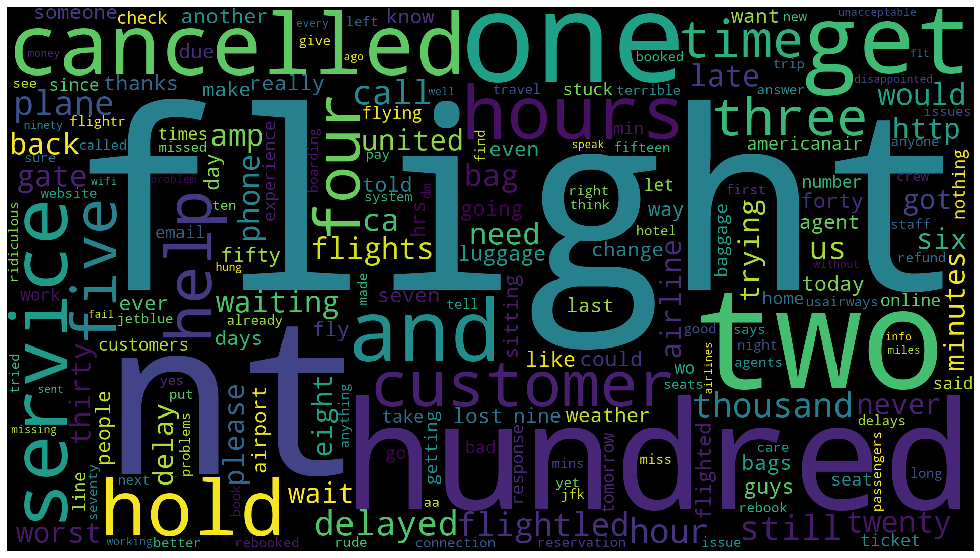

In [15]:
wordcloud = WordCloud(width=1920, height=1080).generate_from_frequencies(neg)

fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud of Neutral Tweets

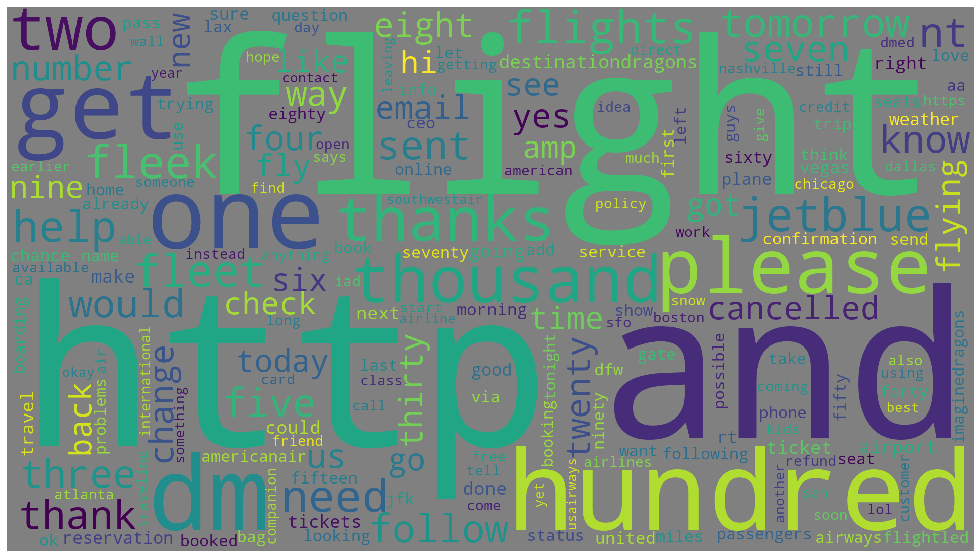

In [16]:
wordcloud = WordCloud(width=1920, height=1080, background_color="grey").generate_from_frequencies(neutral)

fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Oversampling

In [17]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE()
X_sm,y_sm = smote.fit_resample(X,y)

In [18]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2)

## Model Building

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score 

In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
print("KNN Classifier Accuracy:")
knn = accuracy_score(y_test, knn_pred)
print('{:.4f}'.format(knn))

KNN Classifier Accuracy:
0.5827


In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("Random Forest Classifier Accuracy:")
rf = accuracy_score(y_test, rf_pred)
print('{:.4f}'.format(rf))

Random Forest Classifier Accuracy:
0.8745


In [22]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)
print("SVC Accuracy:")
svc = accuracy_score(y_test, svc_pred)
print('{:.4f}'.format(svc))

SVC Accuracy:
0.8627


In [23]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)
print("Multinomial Naive Bayes Accuracy:")
nb = accuracy_score(y_test, nb_pred)
print('{:.4f}'.format(nb))

Multinomial Naive Bayes Accuracy:
0.8102


In [24]:
classifier_list = ['KNN', 'Random Forest', 'SVC', 'Naive Bayes']
acc_scores = [knn,rf,svc,nb]

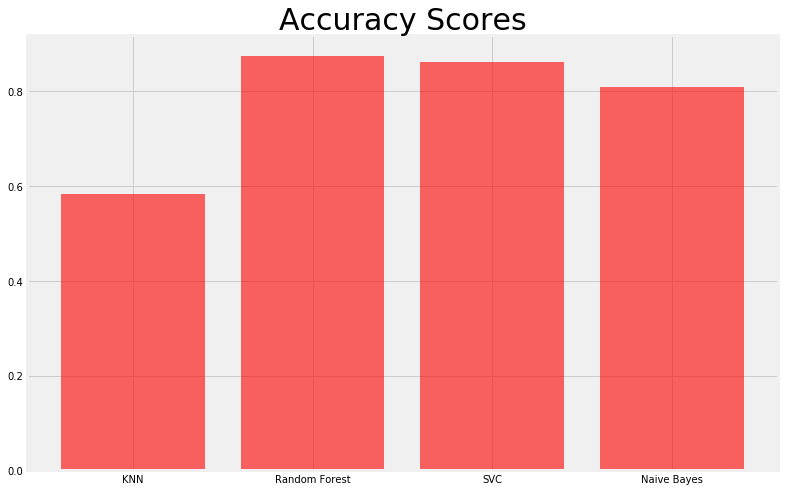

In [25]:
plt.figure(figsize=(12,8))
plt.bar(classifier_list, acc_scores,color = 'red',alpha = 0.6)
plt.title("Accuracy Scores",fontsize = 30)
plt.show()

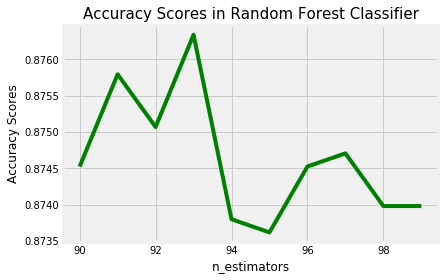

In [26]:
score_list = []
for i in range(90,100):
    rf_model = RandomForestClassifier(n_estimators = i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    knn = accuracy_score(y_test, y_pred)
    score_list.append(knn)
    
plt.plot(range(90,100), score_list,color = 'green')
plt.title("Accuracy Scores in Random Forest Classifier",fontsize = 15)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy Scores")
plt.show()

In [34]:
rf_model = RandomForestClassifier(n_estimators = 93)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

## Model Performance

In [35]:
cm = confusion_matrix(y_test, rf_pred)
print('Confusion Matrix:\n')
print(cm)

Confusion Matrix:

[[1630  196   83]
 [ 167 1606   63]
 [  67  109 1586]]


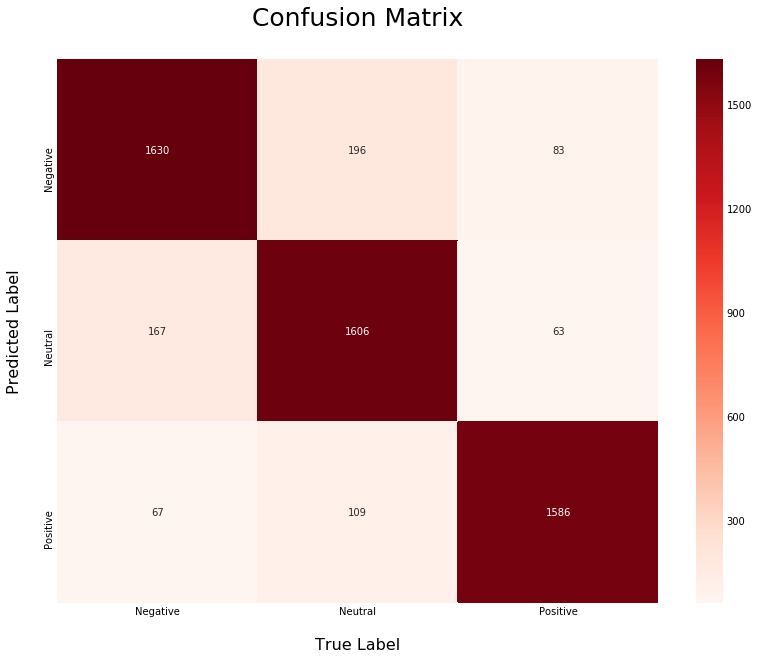

In [36]:
# Plot confusion matrix 

plt.figure(figsize=(12,10))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
ax = sns.heatmap(cm, cmap = plt.cm.Reds, annot = True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix\n', fontsize=25)
plt.xlabel('\nTrue Label', fontsize=16)
plt.ylabel('Predicted Label\n', fontsize=16)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 

plt.show()